# Boston Housing Project

### Apply exploratory data analysis and implement a machine learning model for prediction on Boston Housing dataset

In [236]:
# import libraries
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the data

In [178]:
# import from csv file into a pandas df
df = pd.read_csv('../datasets/Boston.csv')
df.shape

(506, 15)

### Prepare the data

In [179]:
df = df.drop('Unnamed: 0', axis=1)
df.shape

(506, 14)

In [180]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [182]:
# check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [183]:
# summarize the stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [184]:
# check for correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Apply visualization for deeper understanding of the data

In [185]:
# change default style of plotting
sns.set_style('darkgrid')

Text(0, 0.5, 'Price')

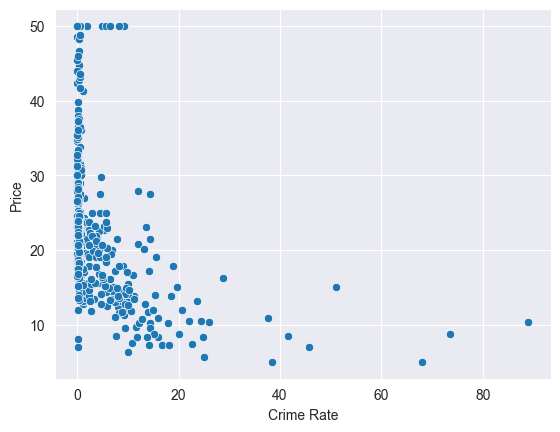

In [186]:
sns.scatterplot(x=df.CRIM, y=df.PRICE)
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

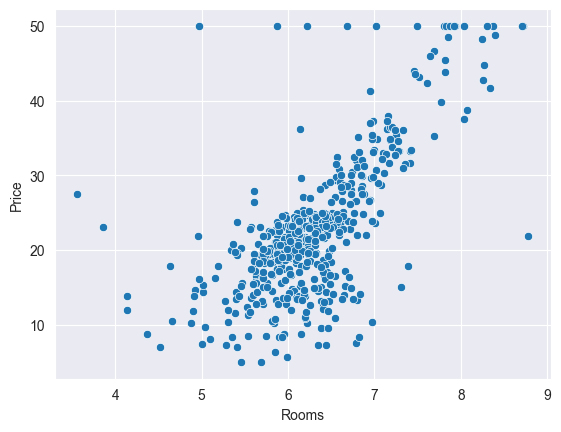

In [187]:
sns.scatterplot(x=df.RM, y=df.PRICE)
plt.xlabel('Rooms')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

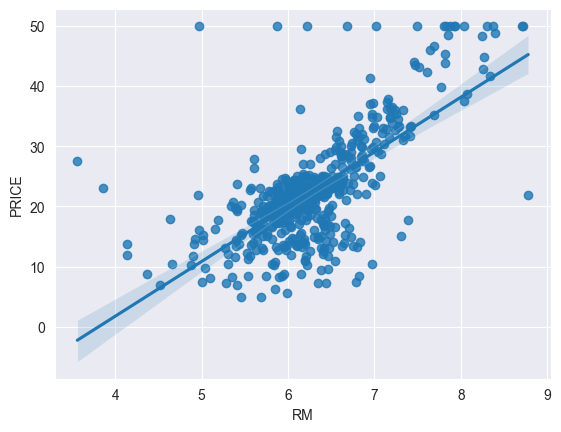

In [188]:
sns.regplot(x='RM', y='PRICE', data=df)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

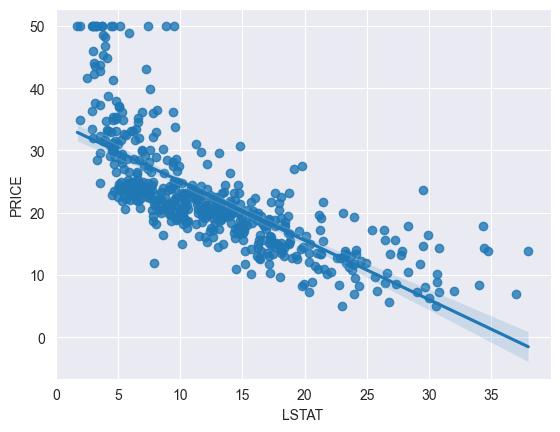

In [189]:
sns.regplot(x='LSTAT', y='PRICE', data=df)

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

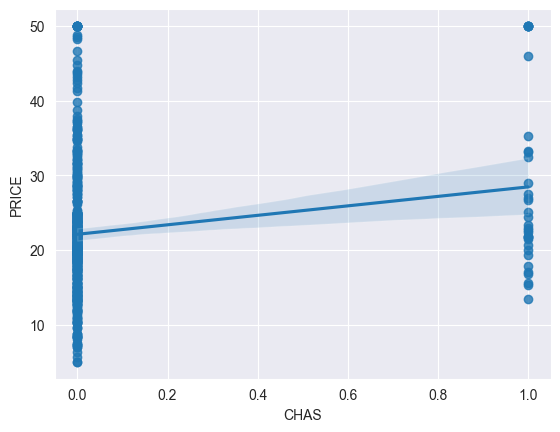

In [190]:
sns.regplot(x='CHAS', y='PRICE', data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

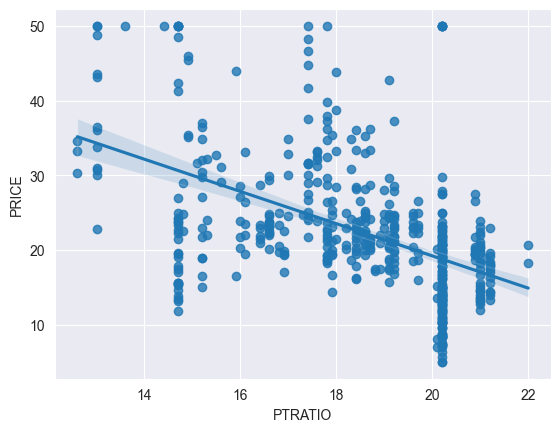

In [191]:
sns.regplot(x='PTRATIO', y='PRICE', data=df)

### Split dataset into features and lables

In [192]:
X = df.drop('PRICE', axis=1)
y = df.PRICE

### Split features and labels intro train and test sets

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [194]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (354, 13), X_test: (152, 13)
y_train: (354,), y_test: (152,)


### Standardize the datasets for performance and scaling

In [196]:
scaler = StandardScaler()
 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the model

In [205]:
# create linear model
model = LinearRegression()

In [207]:
# fitting the model
model.fit(X_train, y_train)

LinearRegression()

### Check the coefficients and the intercept

In [209]:
print('Coefficients:')
model.coef_

Coefficients:


array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [210]:
print('Intercept:')
model.intercept_

Intercept:


23.01581920903955

### Make predictions using the trained model on the testing dataset

In [214]:
y_predict = model.predict(X_test)

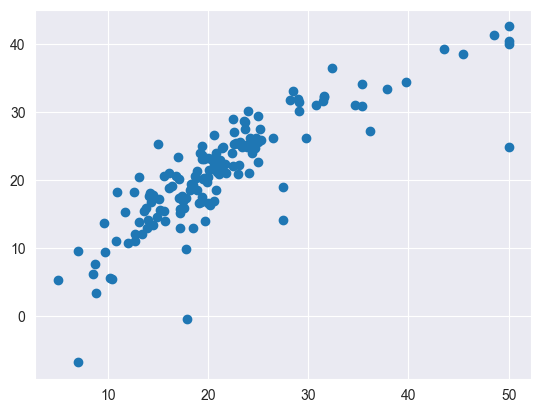

In [220]:
plt.scatter(y_test, y_predict)

### Compute errors

In [228]:
mse = mean_squared_error(y_true=y_test, y_pred=y_predict)
mae = mean_absolute_error(y_true=y_test, y_pred=y_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}\nMAE: {mae}\nRMSE: {rmse}')

MSE: 21.517444231177205
MAE: 3.1627098714574053
RMSE: 4.6386899261728205


In [235]:
score = r2_score(y_true=y_test, y_pred=y_predict)
print(f'r2_score: {score}')

r2_score: 0.7112260057484934


### Pickling the model for deployment

In [239]:
# saving the model to be later on deployed or used
pickle.dump(model, open('../models/model.pkl', 'wb'))